**Importing Pandas library and reading the car price dataset**

In [1]:
import pandas as pd 
df = pd.read_csv('/content/CarPrice_Assignment.csv')

In [2]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Observations:**

- There is no null values.
- car id feature might be useless.
- There are object columns from 2nd to 8th columns
- Scaling will be needed.

#Data Cleaning 

In [4]:
# Dropping the car_ID value since it does not have an impact on car prices.
df.drop('car_ID',axis = 1, inplace= True)

In [5]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [6]:
# Obtaining the unique car brands
df['CarName'] = df['CarName'].str.split().str[0]
print(df['CarName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [7]:
# Avoidong inconsistent feature names 
df.loc[df['CarName'] == 'maxda', 'CarName'] = 'mazda'
df.loc[df['CarName'] == 'Nissan', 'CarName'] = 'nissan'
df.loc[df['CarName'] == 'porcshce', 'CarName'] = 'porsche'
df.loc[df['CarName'] == 'toyouta', 'CarName'] = 'toyota'
df.loc[df['CarName'] == 'vokswagen', 'CarName'] = 'volkswagen'
df.loc[df['CarName'] == 'vw', 'CarName'] = 'volkswagen'
print(df['CarName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [8]:
# Checking each columns if there are duplicated values 
df.loc[df.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


#EDA — Exploratory Data Analysis

In [9]:
# Checking object type features 
obj_cols = df.select_dtypes(include = 'object').columns
for col in obj_cols:
    print(col, ' : ', df[col].unique(), end = '\n\n')

CarName  :  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']

fueltype  :  ['gas' 'diesel']

aspiration  :  ['std' 'turbo']

doornumber  :  ['two' 'four']

carbody  :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drivewheel  :  ['rwd' 'fwd' '4wd']

enginelocation  :  ['front' 'rear']

enginetype  :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

cylindernumber  :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

fuelsystem  :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']



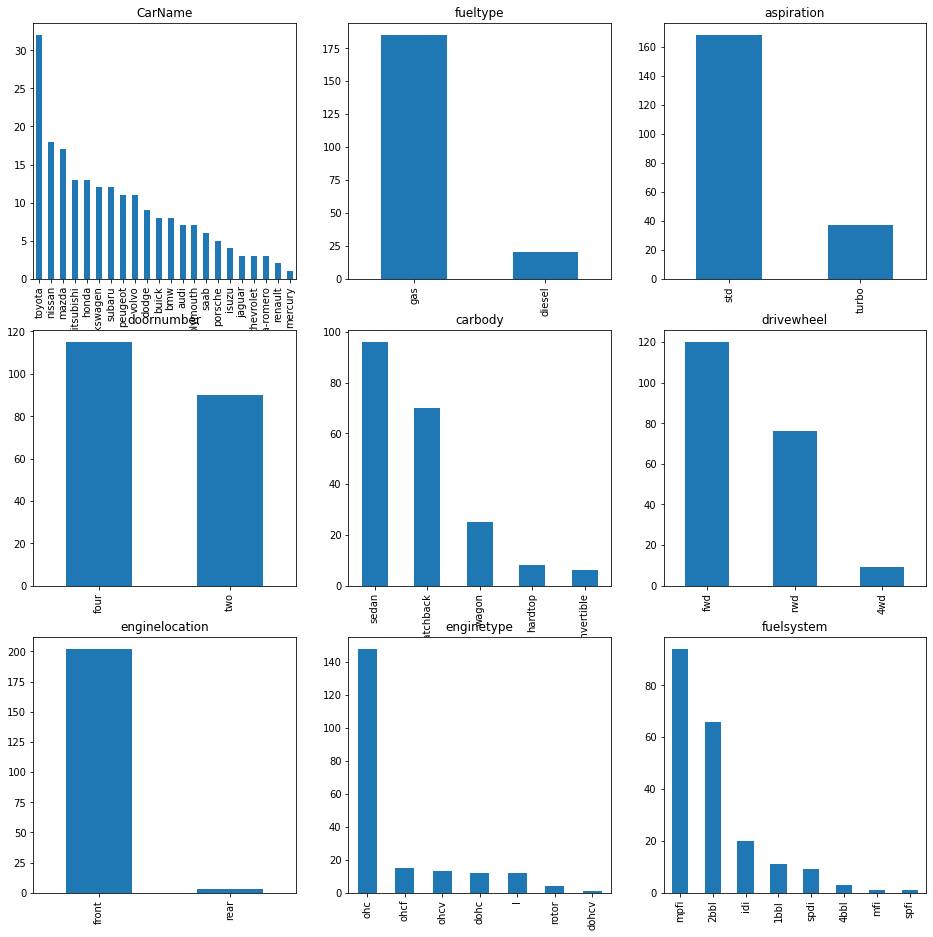

In [10]:
# Inspecting the value counts with graphs
import matplotlib.pyplot as plt
cols = df.select_dtypes(include = 'object').columns.drop('cylindernumber')
plt.figure(figsize=(16, 16))
n = len(cols)
for i in range(1, n+1):
    plt.subplot(3, 3, i)
    plt1 = df[cols[i-1]].value_counts()
    plt1.plot(kind = 'bar')
    plt.title(cols[i-1])

In [11]:
# Droping enginelocation feature since it does not impact on car prices so much
df.drop('enginelocation', axis = 1, inplace = True)

In [12]:
print(df['fuelsystem'].value_counts())
print("**************************")
print(df['enginetype'].value_counts())

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64
**************************
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


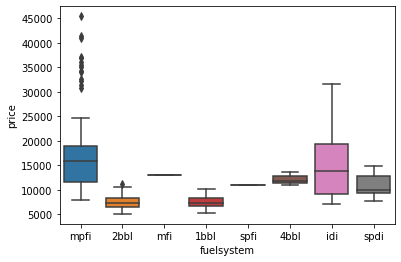

In [13]:
import seaborn as sns
sns.boxplot(data = df, y = 'price', x = 'fuelsystem')

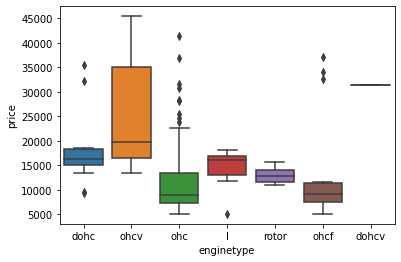

In [14]:
sns.boxplot(data = df, y = 'price', x = 'enginetype')

In [15]:
df.loc[df['fuelsystem'] == 'mfi', 'fuelsystem'] = 'idi'
df.loc[df['fuelsystem'] == 'spfi', 'fuelsystem'] = 'idi'
df.loc[df['fuelsystem'] == '4bbl', 'fuelsystem'] = 'idi'
df.loc[df['enginetype'] == 'dohcv', 'enginetype'] = 'ohcv'
df.loc[df['enginetype'] == 'rotor', 'enginetype'] = 'l'

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64


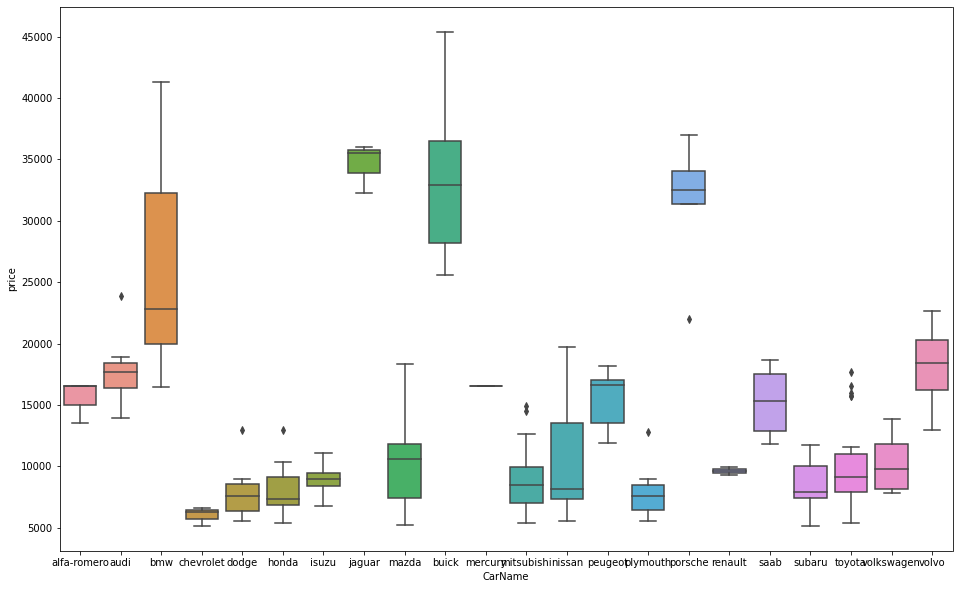

In [16]:
print(df['CarName'].value_counts())
plt.figure(figsize=(16, 10))
sns.boxplot(data = df, y = 'price', x = 'CarName')

In [17]:
df.loc[df['CarName'] == 'mercury', 'CarName'] = 'peugeot'
df.loc[df['CarName'] == 'renault', 'CarName'] = 'volkswagen'
df.loc[df['CarName'] == 'alfa-romero', 'CarName'] = 'saab'
df.loc[df['CarName'] == 'jaguar', 'CarName'] = 'buick'
df.loc[df['CarName'] == 'chevrolet', 'CarName'] = 'plymouth'

#Data Preprocessing

In [18]:
from sklearn.model_selection import train_test_split 
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [19]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

**Label Encoding**

In [20]:
class CylinderNumberEncoder(BaseEstimator,TransformerMixin):
        
    def fit(self,X,Y=None):
        return self
    
    def transform(self,X):
        
        X.loc[df['cylindernumber'] == 'two', 'cylindernumber'] = 2
        X.loc[df['cylindernumber'] == 'three', 'cylindernumber'] = 3
        X.loc[df['cylindernumber'] == 'four', 'cylindernumber'] = 4
        X.loc[df['cylindernumber'] == 'five', 'cylindernumber'] = 5
        X.loc[df['cylindernumber'] == 'six', 'cylindernumber'] = 6
        X.loc[df['cylindernumber'] == 'eight', 'cylindernumber'] = 8
        X.loc[df['cylindernumber'] == 'twelve', 'cylindernumber']=12
        
        X['cylindernumber'] = X['cylindernumber'].astype(str).astype(int)
        
        return X

**One-hot encoding**

In [21]:
class DummyVariables(BaseEstimator,TransformerMixin):
     
    def fit(self,X,Y=None):
        return self
    
    def transform(self,X):
        
        dummy_cols = X.select_dtypes(include = 'object').columns
        X = pd.get_dummies(X, columns = dummy_cols, drop_first=True)
        
        return X

**Outliers**

In [22]:
def number_of_outliers(df):
    
    df = df.select_dtypes(exclude = 'object')
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(number_of_outliers(df_train))
print(number_of_outliers(df_test))




symboling            0
wheelbase            3
carlength            0
carwidth             5
carheight            0
curbweight           0
enginesize           8
boreratio            0
stroke              19
compressionratio    27
horsepower           5
peakrpm              2
citympg              1
highwaympg           2
price               12
dtype: int64
symboling           0
wheelbase           2
carlength           3
carwidth            4
carheight           0
curbweight          0
enginesize          1
boreratio           2
stroke              5
compressionratio    2
horsepower          1
peakrpm             0
citympg             0
highwaympg          0
price               3
dtype: int64


In [23]:
import numpy as np
def outlier_treatment(datacolumn):
        
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    
    return lower_range,upper_range
class OutlierTreatment(BaseEstimator,TransformerMixin):
        
    def fit(self,X,Y=None):
        return self
    
    def transform(self,X):
        
        for col in X.columns:
            lowerbound,upperbound = outlier_treatment(X[col])
            X[col]=np.clip(X[col],a_min=lowerbound,a_max=upperbound)
        return X

**Scaling**

In [24]:
from sklearn.preprocessing import MinMaxScaler
class CustomizedScaler(BaseEstimator,TransformerMixin):
      
    def fit(self,X,Y=None):
        return self
    
    def transform(self,X):
        
        names = X.columns
        scaler = MinMaxScaler()
        scaler.fit(X)
        X =scaler.transform(X)
        X = pd.DataFrame(X, columns = names)
        
        return X

**Pipeline**

In [25]:
#Sklearn pipeline function to activate all steps

pipeline = Pipeline( steps = [
    
    ('cylinder_number_encoder', CylinderNumberEncoder()),
    ('encoder', DummyVariables()),
    ('outlier', OutlierTreatment()),
    ('scaler', CustomizedScaler())
])
df_train = pipeline.fit_transform(df_train)
df_test = pipeline.fit_transform(df_test)

In [26]:
X_train = df_train.drop('price', axis = 1)
y_train = df_train.price
X_test = df_test.drop('price', axis = 1)
y_test = df_test.price
X_train = X_train[X_test.columns]

**Feature Selection**

In [27]:
import statsmodels.api as sm
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

['symboling', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'carbody_hatchback', 'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'fuelsystem_idi', 'fuelsystem_spdi']


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
# Updating the training set with selected features
X_train = X_train[selected_features_BE]

#Building Model

In [29]:
X_train = sm.add_constant(X_train) #Adding the constant
lm = sm.OLS(y_train, X_train).fit() # fitting the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     99.73
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           2.32e-65
Time:                        16:55:06   Log-Likelihood:                 158.24
No. Observations:                 164   AIC:                            -290.5
Df Residuals:                     151   BIC:                            -250.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1526      0.05

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [30]:
X_test = X_test[selected_features_BE]
X_test = sm.add_constant(X_test)
y_pred = lm.predict(X_test)
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.7828025643949676

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# having 18 neuron is based on the number of available features
model = Sequential()
model.add(Dense(18,activation = 'relu'))
model.add(Dense(18,activation = 'relu'))
model.add(Dense(18,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mean_squared_error')

In [35]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
model.summary()

Epoch 1/400
2/2 [==============================] - 1s 274ms/step - loss: 0.1094 - val_loss: 0.1050
Epoch 2/400
2/2 [==============================] - 0s 62ms/step - loss: 0.0957 - val_loss: 0.0931
Epoch 3/400
2/2 [==============================] - 0s 72ms/step - loss: 0.0833 - val_loss: 0.0818
Epoch 4/400
2/2 [==============================] - 0s 53ms/step - loss: 0.0717 - val_loss: 0.0711
Epoch 5/400
2/2 [==============================] - 0s 60ms/step - loss: 0.0613 - val_loss: 0.0618
Epoch 6/400
2/2 [==============================] - 0s 55ms/step - loss: 0.0517 - val_loss: 0.0545
Epoch 7/400
2/2 [==============================] - 0s 38ms/step - loss: 0.0445 - val_loss: 0.0499
Epoch 8/400
2/2 [==============================] - 0s 38ms/step - loss: 0.0394 - val_loss: 0.0472
Epoch 9/400
2/2 [==============================] - 0s 59ms/step - loss: 0.0357 - val_loss: 0.0463
Epoch 10/400
2/2 [==============================] - 0s 52ms/step - loss: 0.0345 - val_loss: 0.0462
Epoch 11/400
2/2 [

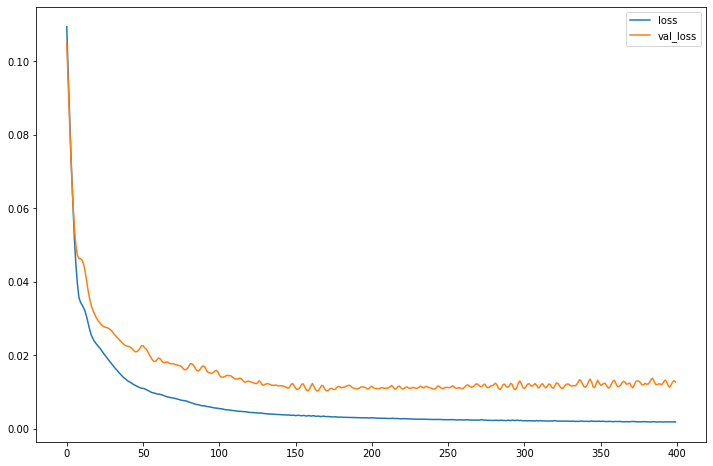

In [36]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

2/2 [==============================] - 0s 11ms/step
MAE: 0.08996572665313625
MSE: 0.012757854023948413
RMSE: 0.11295067075475211
VarScore: 0.8616194191527721


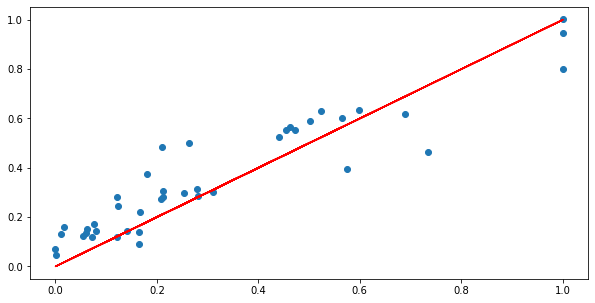

In [37]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

The score of our Linear Regression is around **78%,** so this model had room for improvement. Then we got an accuracy of **86%** with Keras Regression model.